Exercice 1


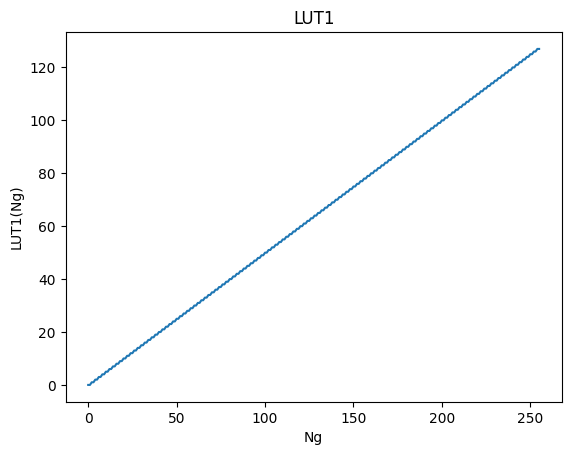

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
Ng = np.arange(256)
LUT1 = (0.5*Ng).astype(np.uint8)
plt.plot(Ng, LUT1)
plt.title('LUT1')
plt.xlabel('Ng')
plt.ylabel('LUT1(Ng)')
plt.show()


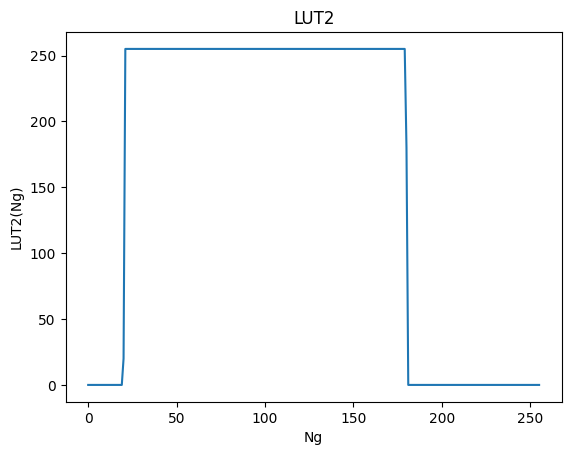

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
Ng = np.arange(256)
max_val = 180
min_val = 20
LUT2 = Ng.astype(np.uint8)
LUT2[0: min_val]=0
LUT2[min_val+1:max_val]=255
LUT2[max_val+1:256] =0
plt.plot(Ng, LUT2)
plt.title('LUT2')
plt.xlabel('Ng')
plt.ylabel('LUT2(Ng)')
plt.show()


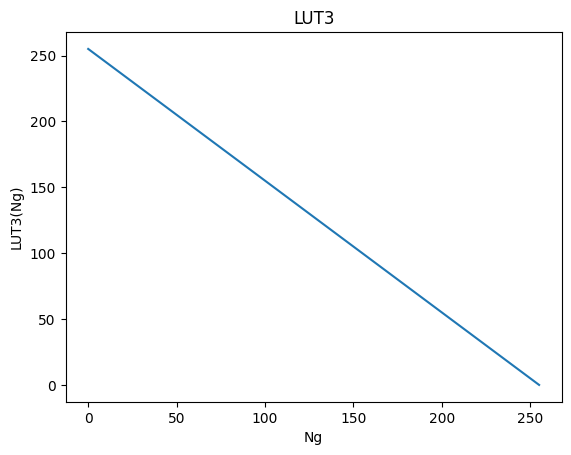

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
Ng = np.arange(256)
LUT3 = (255-Ng).astype(np.uint8)
plt.plot(Ng, LUT3)
plt.title('LUT3')
plt.xlabel('Ng')
plt.ylabel('LUT3(Ng)')
plt.show()

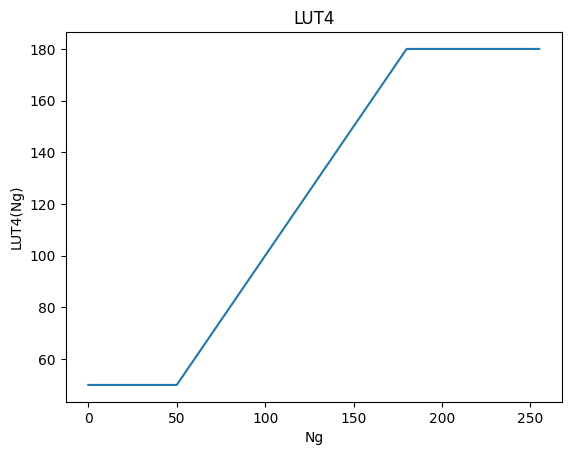

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

a = 50
b = 180

def linSat(x):
    if x < a:
        return a
    elif a <= x <= b:
        return x
    else:
        return b

Ng = np.arange(256)
LUT4 = np.zeros_like(Ng)

for i, val in enumerate(Ng):
    LUT4[i] = linSat(val)

plt.plot(Ng, LUT4)
plt.title('LUT4')
plt.xlabel('Ng')
plt.ylabel('LUT4(Ng)')
plt.show()


In [ ]:
import cv2

image = cv2.imread('image1.bmp', cv2.IMREAD_GRAYSCALE)

image_LUT1 = cv2.LUT(image, LUT1)
image_LUT2 = cv2.LUT(image, LUT2)
image_LUT3 = cv2.LUT(image, LUT3)
image_LUT4 = cv2.LUT(image, LUT4)


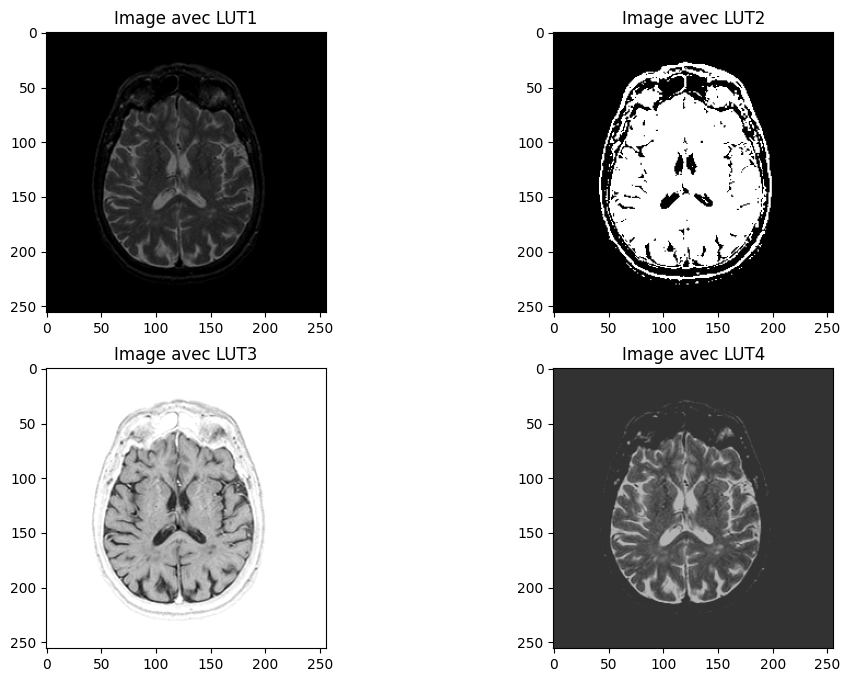

In [ ]:
plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
plt.imshow(image_LUT1, cmap='gray', vmin=0, vmax=255)
plt.title('Image avec LUT1')

plt.subplot(2, 2, 2)
plt.imshow(image_LUT2, cmap='gray', vmin=0, vmax=255)
plt.title('Image avec LUT2')

plt.subplot(2, 2, 3)
plt.imshow(image_LUT3, cmap='gray', vmin=0, vmax=255)
plt.title('Image avec LUT3')

plt.subplot(2, 2, 4)
plt.imshow(image_LUT4, cmap='gray', vmin=0, vmax=255)
plt.title('Image avec LUT4')

plt.show()


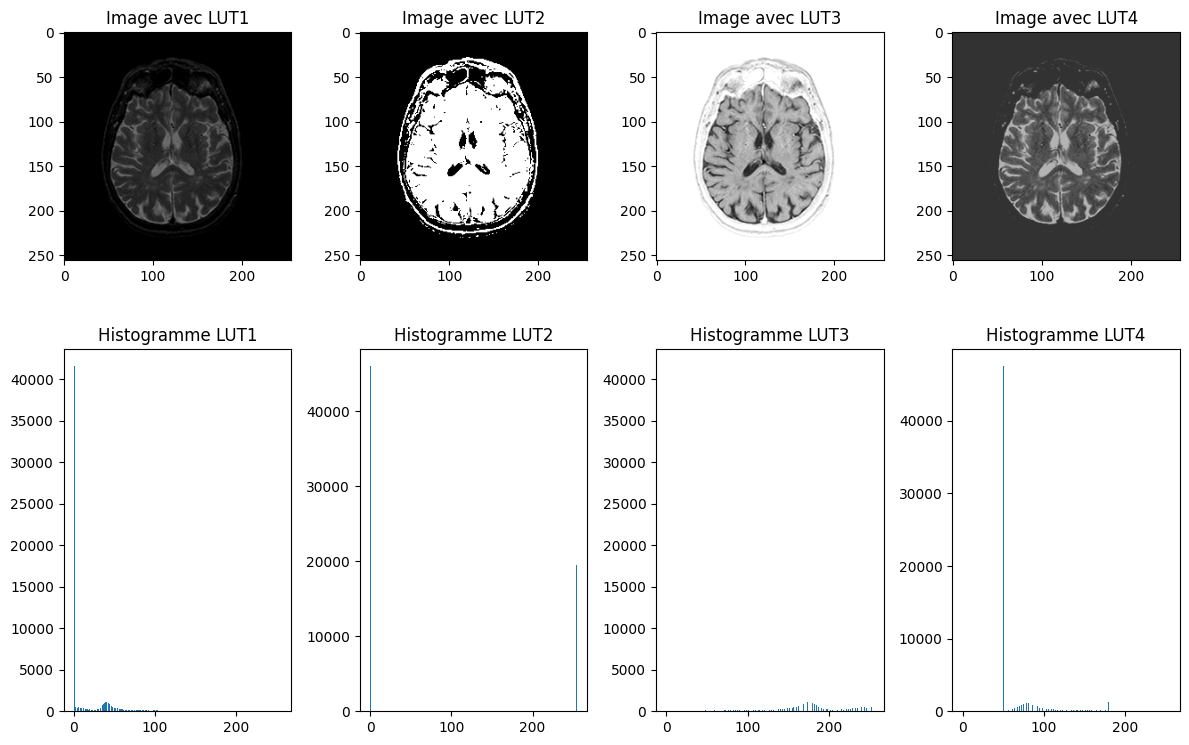

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.imshow(image_LUT1, cmap='gray', vmin=0, vmax=255)
plt.title('Image avec LUT1')
plt.subplot(2, 4, 5)
plt.hist(image_LUT1.ravel(), bins=256, range=(0, 255))
plt.title('Histogramme LUT1')

plt.subplot(2, 4, 2)
plt.imshow(image_LUT2, cmap='gray', vmin=0, vmax=255)
plt.title('Image avec LUT2')
plt.subplot(2, 4, 6)
plt.hist(image_LUT2.ravel(), bins=256, range=(0, 255))
plt.title('Histogramme LUT2')

plt.subplot(2, 4, 3)
plt.imshow(image_LUT3, cmap='gray', vmin=0, vmax=255)
plt.title('Image avec LUT3')
plt.subplot(2, 4, 7)
plt.hist(image_LUT3.ravel(), bins=256, range=(0, 255))
plt.title('Histogramme LUT3')

plt.subplot(2, 4, 4)
plt.imshow(image_LUT4, cmap='gray', vmin=0, vmax=255)
plt.title('Image avec LUT4')
plt.subplot(2, 4, 8)
plt.hist(image_LUT4.ravel(), bins=256, range=(0, 255))
plt.title('Histogramme LUT4')

plt.tight_layout()
plt.show()


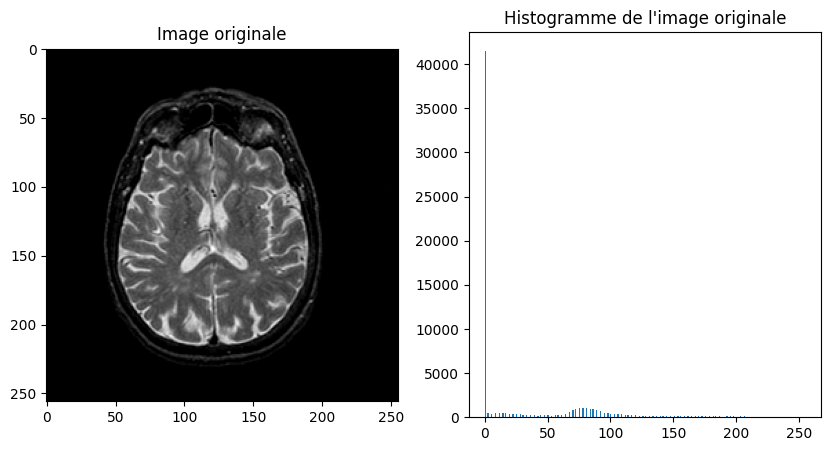

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image en niveaux de gris
image_originale = cv2.imread('image1.bmp', cv2.IMREAD_GRAYSCALE)

# Afficher l'image originale
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_originale, cmap='gray')
plt.title('Image originale')

# Afficher l'histogramme de l'image originale
plt.subplot(1, 2, 2)
plt.hist(image_originale.ravel(), bins=256, range=(0, 255))
plt.title('Histogramme de l\'image originale')

plt.show()


## Exercice **2**

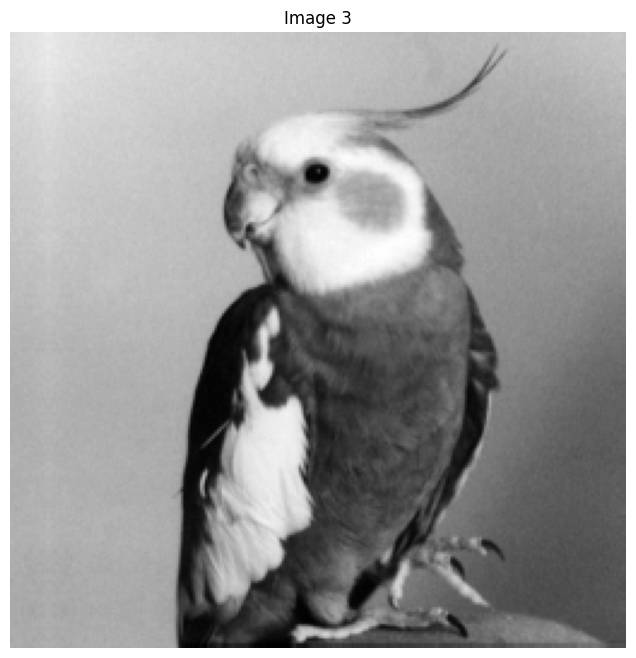

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
Im = cv2.imread('image3.bmp', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8, 8))
plt.imshow(Im, cmap='gray')
plt.title("Image 3")
plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def salt_and_pepper_noise(image, density):
    noisy_image = np.copy(image)
    salt_vs_pepper = 0.5
    amount = density * image.size
    num_salt = np.ceil(amount * salt_vs_pepper)
    num_pepper = np.ceil(amount * (1.0 - salt_vs_pepper))

    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0
    return noisy_image

Im = cv2.imread('image3.bmp', cv2.IMREAD_GRAYSCALE)

Ig = cv2.GaussianBlur(Im, (0, 0), 0.1)

Isp = salt_and_pepper_noise(Im, 0.01)

Is = Im.copy()
cv2.randn(Is, 0, 0.02 * 255)
Is = cv2.add(Is, Im, dtype=cv2.CV_8UC1)

Ipois = np.random.poisson(Im)





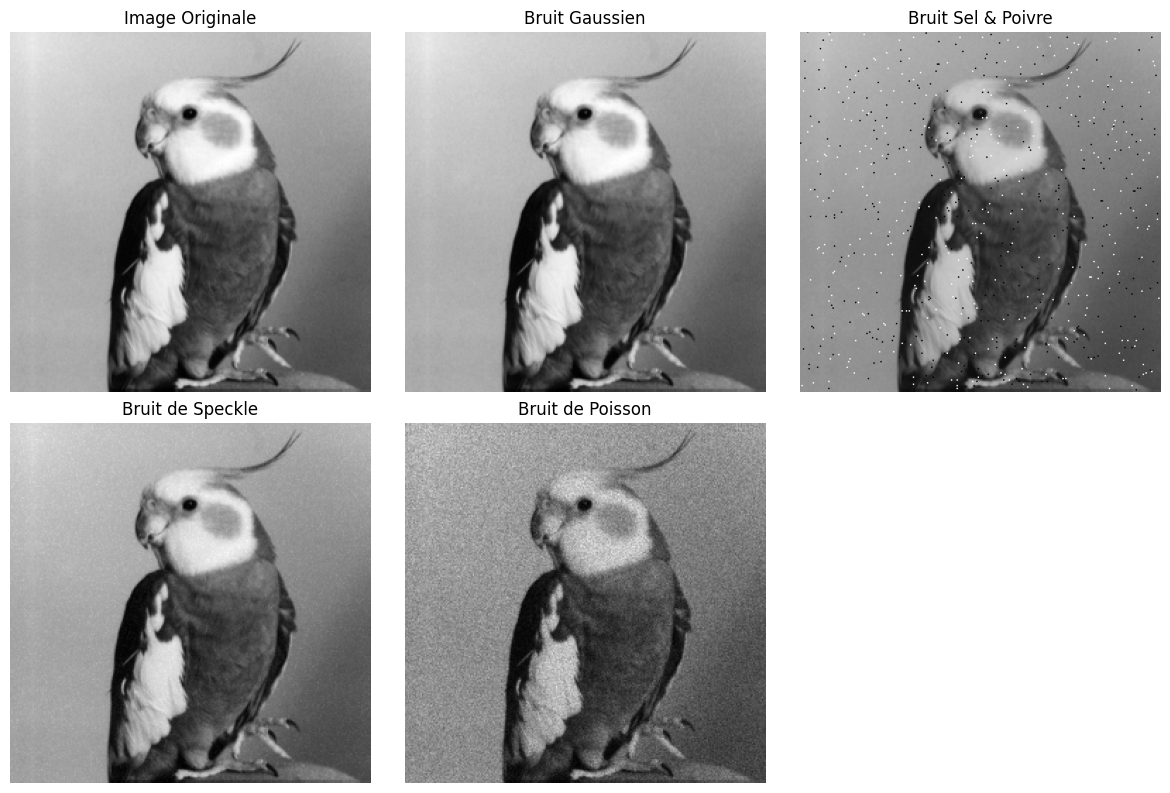

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(Im, cmap='gray')
plt.title('Image Originale')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(Ig, cmap='gray')
plt.title('Bruit Gaussien')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(Isp, cmap='gray')
plt.title('Bruit Sel & Poivre')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(Is, cmap='gray')
plt.title('Bruit de Speckle')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(Ipois, cmap='gray')
plt.title('Bruit de Poisson')
plt.axis('off')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/skimage/metrics/simple_metrics.py:163: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range ** 2) / err)
<ipython-input-8-2fbb79f47632>:8: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  P4 = peak_signal_noise_ratio(Im, Ipois)


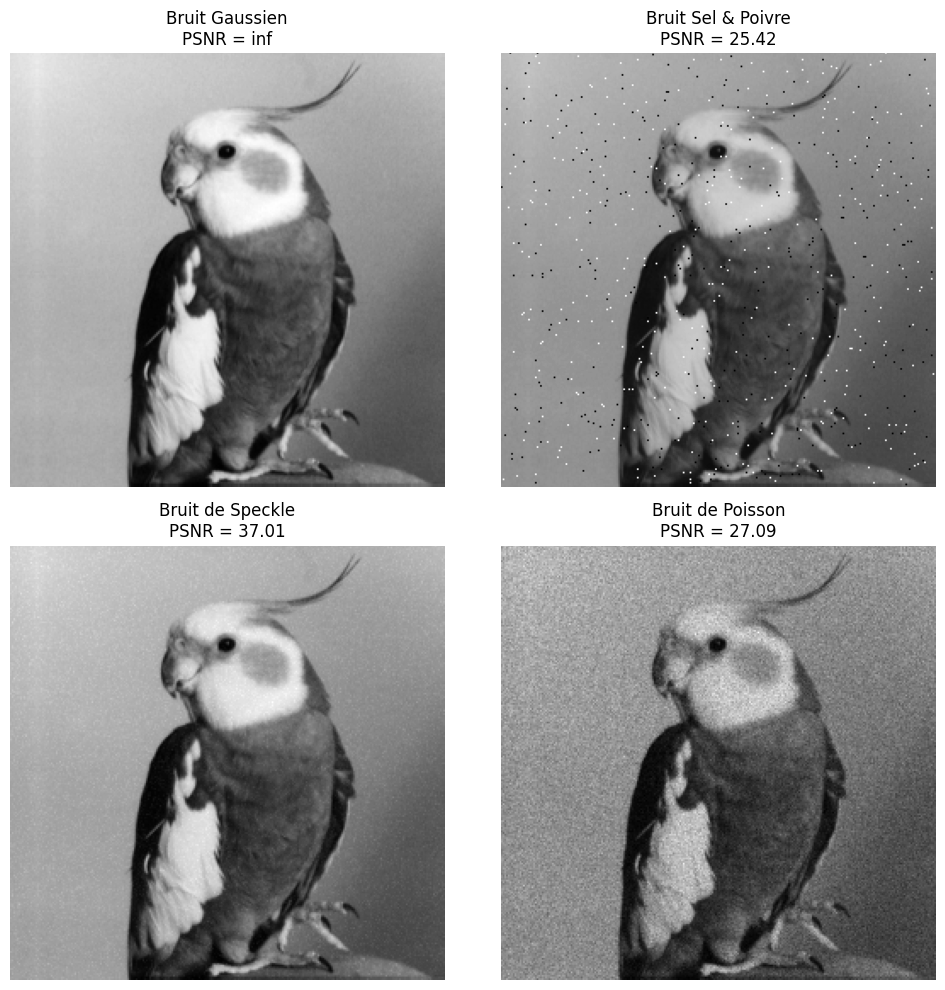

In [ ]:
from skimage.metrics import peak_signal_noise_ratio
import matplotlib.pyplot as plt


P1 = peak_signal_noise_ratio(Im, Ig)
P2 = peak_signal_noise_ratio(Im, Isp)
P3 = peak_signal_noise_ratio(Im, Is)
P4 = peak_signal_noise_ratio(Im, Ipois)


fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(Ig, cmap='gray')
ax[0, 0].set_title('Bruit Gaussien\nPSNR = {:.2f}'.format(P1))
ax[0, 0].axis('off')

ax[0, 1].imshow(Isp, cmap='gray')
ax[0, 1].set_title('Bruit Sel & Poivre\nPSNR = {:.2f}'.format(P2))
ax[0, 1].axis('off')

ax[1, 0].imshow(Is, cmap='gray')
ax[1, 0].set_title('Bruit de Speckle\nPSNR = {:.2f}'.format(P3))
ax[1, 0].axis('off')

ax[1, 1].imshow(Ipois, cmap='gray')
ax[1, 1].set_title('Bruit de Poisson\nPSNR = {:.2f}'.format(P4))
ax[1, 1].axis('off')


plt.tight_layout()

plt.show()


In [ ]:
import cv2

Isp1 = cv2.medianBlur(Isp, 3)

Ipois1 = cv2.medianBlur(cv2.convertScaleAbs(Ipois), 3)
Is1 = cv2.medianBlur(Is, 3)
Ig1 = cv2.medianBlur(Ig, 3)


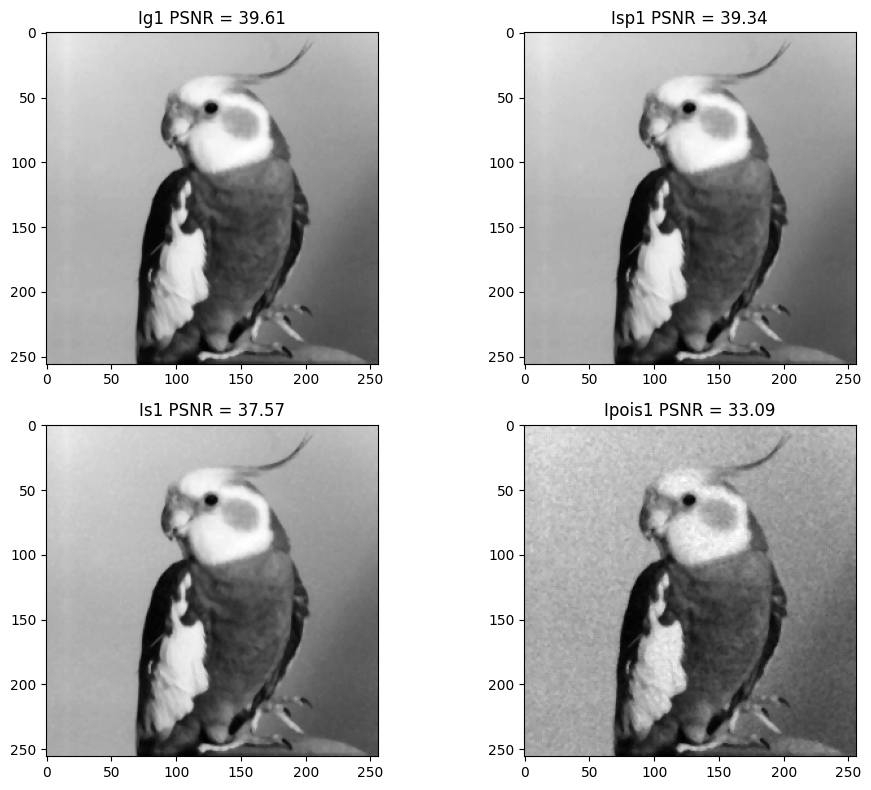

In [ ]:
from skimage.metrics import peak_signal_noise_ratio
import matplotlib.pyplot as plt


P1 = peak_signal_noise_ratio(Im, Ig1)
P2 = peak_signal_noise_ratio(Im, Isp1)
P3 = peak_signal_noise_ratio(Im, Is1)
P4 = peak_signal_noise_ratio(Im, Ipois1)


fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].imshow(Ig1, cmap='gray')
axes[0, 0].set_title('Ig1 PSNR = {:.2f}'.format(P1))

axes[0, 1].imshow(Isp1, cmap='gray')
axes[0, 1].set_title('Isp1 PSNR = {:.2f}'.format(P2))

axes[1, 0].imshow(Is1, cmap='gray')
axes[1, 0].set_title('Is1 PSNR = {:.2f}'.format(P3))

axes[1, 1].imshow(Ipois1, cmap='gray')
axes[1, 1].set_title('Ipois1 PSNR = {:.2f}'.format(P4))

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio

h = np.ones((3, 3), dtype=np.float32) / 9.0

Isp2 = cv2.filter2D(Isp, -1, h)
Ipois2 = cv2.filter2D(Ipois.astype(np.uint8), -1, h)
Is2 = cv2.filter2D(Is, -1, h)
Ig2 = cv2.filter2D(Ig, -1, h)

P1_avg = peak_signal_noise_ratio(Im, Ig2)
P2_avg = peak_signal_noise_ratio(Im, Isp2)
P3_avg = peak_signal_noise_ratio(Im, Is2)
P4_avg = peak_signal_noise_ratio(Im, Ipois2)


In [ ]:
from skimage.metrics import peak_signal_noise_ratio

P1_a = peak_signal_noise_ratio(Im, Ig2)
P2_a = peak_signal_noise_ratio(Im, Isp2)
P3_a = peak_signal_noise_ratio(Im, Is2)
P4_a = peak_signal_noise_ratio(Im, Ipois2)


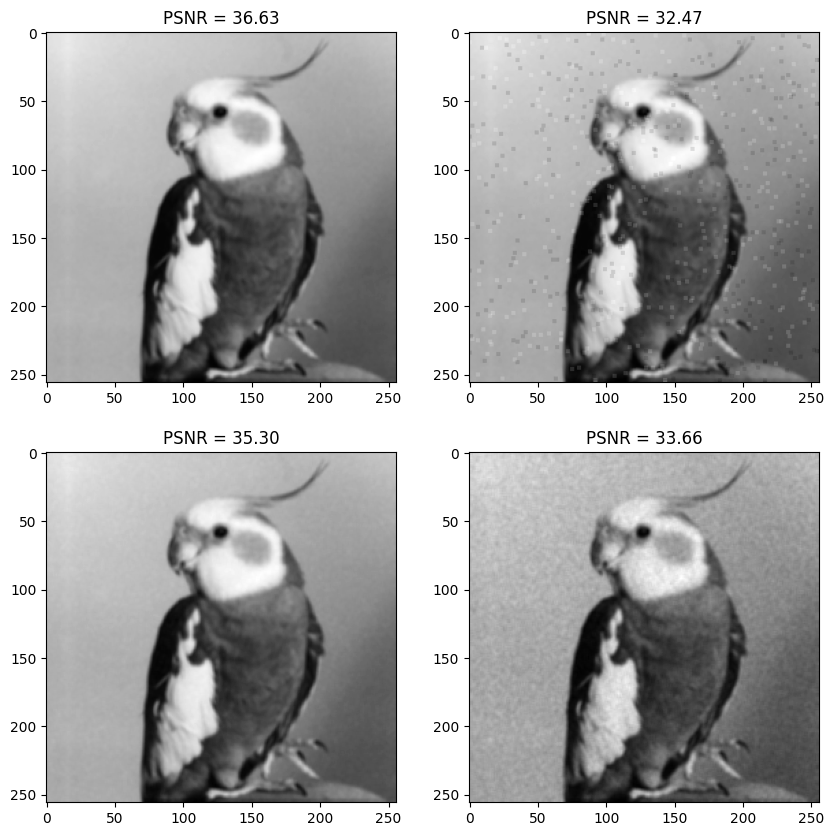

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(Ig2, cmap='gray')
ax[0, 0].set_title('PSNR = {:.2f}'.format(P1_a))

ax[0, 1].imshow(Isp2, cmap='gray')
ax[0, 1].set_title('PSNR = {:.2f}'.format(P2_a))

ax[1, 0].imshow(Is2, cmap='gray')
ax[1, 0].set_title('PSNR = {:.2f}'.format(P3_a))

ax[1, 1].imshow(Ipois2, cmap='gray')
ax[1, 1].set_title('PSNR = {:.2f}'.format(P4_a))

plt.show()


# **Exercice 3**

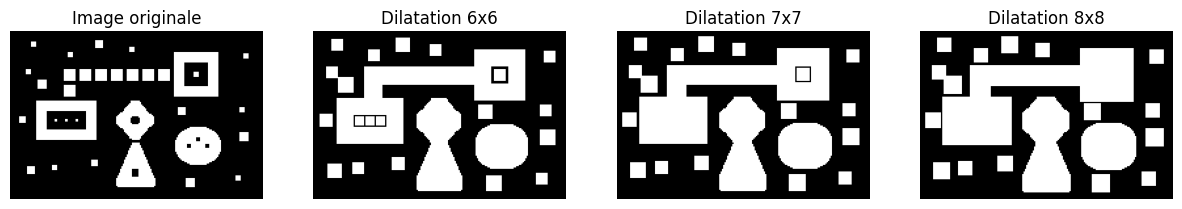

In [ ]:
import cv2
import matplotlib.pyplot as plt


I5 = cv2.imread("image5.bmp")


se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 6))
se2 = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
se3 = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))

imD1 = cv2.dilate(I5, se1)
imD2 = cv2.dilate(I5, se2)
imD3 = cv2.dilate(I5, se3)


plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(I5, cv2.COLOR_BGR2RGB))
plt.title('Image originale')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(imD1, cv2.COLOR_BGR2RGB))
plt.title('Dilatation 6x6')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(imD2, cv2.COLOR_BGR2RGB))
plt.title('Dilatation 7x7')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(imD3, cv2.COLOR_BGR2RGB))
plt.title('Dilatation 8x8')
plt.axis('off')

plt.show()


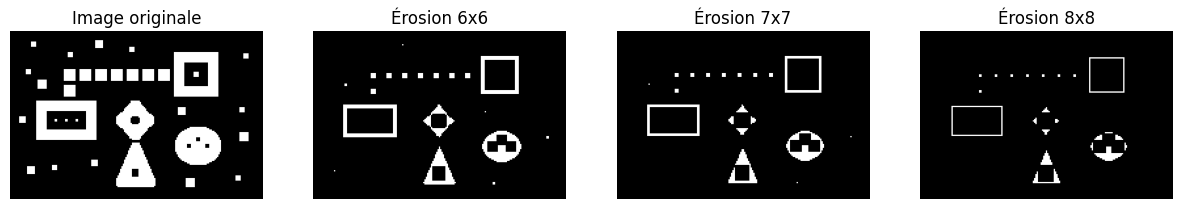

In [ ]:

imor1 = cv2.erode(I5, se1)
imor2 = cv2.erode(I5, se2)
imor3 = cv2.erode(I5, se3)


plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(I5, cv2.COLOR_BGR2RGB))
plt.title('Image originale')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(imor1, cv2.COLOR_BGR2RGB))
plt.title('Érosion 6x6')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(imor2, cv2.COLOR_BGR2RGB))
plt.title('Érosion 7x7')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(imor3, cv2.COLOR_BGR2RGB))
plt.title('Érosion 8x8')
plt.axis('off')

plt.show()


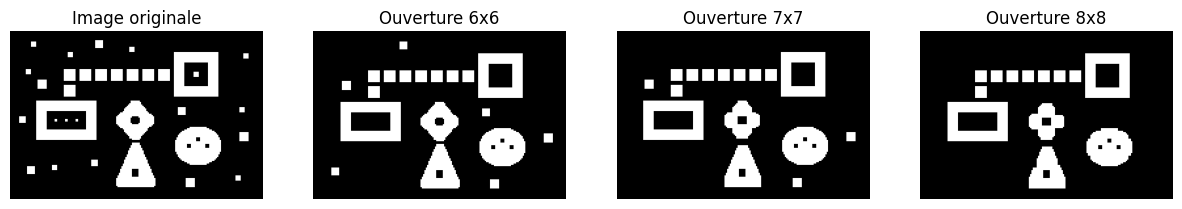

In [ ]:

imop1 = cv2.morphologyEx(I5, cv2.MORPH_OPEN, se1)
imop2 = cv2.morphologyEx(I5, cv2.MORPH_OPEN, se2)
imop3 = cv2.morphologyEx(I5, cv2.MORPH_OPEN, se3)


plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(I5, cv2.COLOR_BGR2RGB))
plt.title('Image originale')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(imop1, cv2.COLOR_BGR2RGB))
plt.title('Ouverture 6x6')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(imop2, cv2.COLOR_BGR2RGB))
plt.title('Ouverture 7x7')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(imop3, cv2.COLOR_BGR2RGB))
plt.title('Ouverture 8x8')
plt.axis('off')

plt.show()


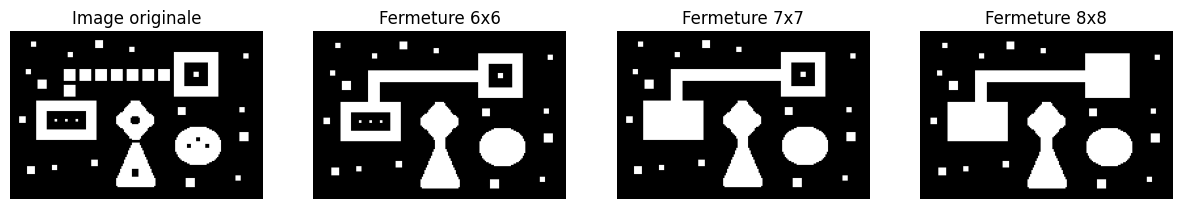

In [ ]:

imclo1 = cv2.morphologyEx(I5, cv2.MORPH_CLOSE, se1)
imclo2 = cv2.morphologyEx(I5, cv2.MORPH_CLOSE, se2)
imclo3 = cv2.morphologyEx(I5, cv2.MORPH_CLOSE, se3)


plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(I5, cv2.COLOR_BGR2RGB))
plt.title('Image originale')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(imclo1, cv2.COLOR_BGR2RGB))
plt.title('Fermeture 6x6')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(imclo2, cv2.COLOR_BGR2RGB))
plt.title('Fermeture 7x7')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(imclo3, cv2.COLOR_BGR2RGB))
plt.title('Fermeture 8x8')
plt.axis('off')

plt.show()


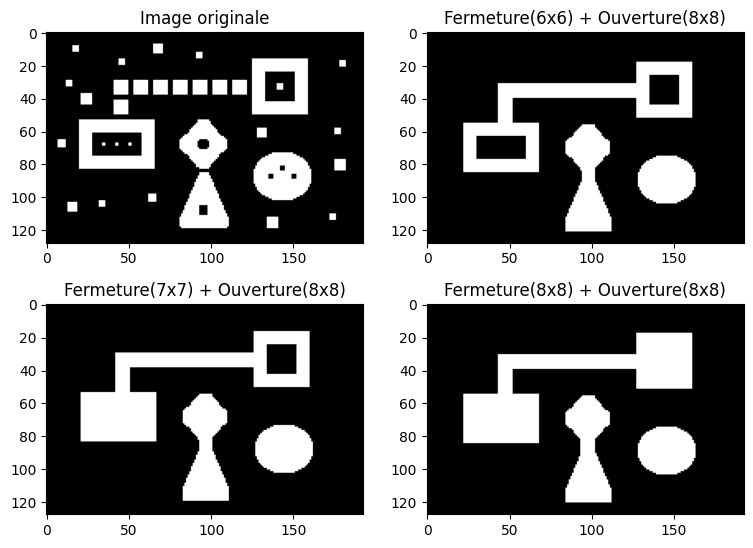

In [ ]:

se_6x6 = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 6))
se_7x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
se_8x8 = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))

im_clo_6x6_op_8x8 = cv2.morphologyEx(I5, cv2.MORPH_CLOSE, se_6x6)
im_clo_7x7_op_8x8 = cv2.morphologyEx(I5, cv2.MORPH_CLOSE, se_7x7)
im_clo_8x8_op_8x8 = cv2.morphologyEx(I5, cv2.MORPH_CLOSE, se_8x8)
im_clo_6x6_op_8x8 = cv2.morphologyEx(im_clo_6x6_op_8x8, cv2.MORPH_OPEN, se_8x8)
im_clo_7x7_op_8x8 = cv2.morphologyEx(im_clo_7x7_op_8x8, cv2.MORPH_OPEN, se_8x8)
im_clo_8x8_op_8x8 = cv2.morphologyEx(im_clo_8x8_op_8x8, cv2.MORPH_OPEN, se_8x8)

plt.figure(figsize=(9, 10))

plt.subplot(3, 2, 1)
plt.imshow(I5, cmap='gray')
plt.title('Image originale')

plt.subplot(3, 2, 2)
plt.imshow(im_clo_6x6_op_8x8, cmap='gray')
plt.title('Fermeture(6x6) + Ouverture(8x8)')

plt.subplot(3, 2, 3)
plt.imshow(im_clo_7x7_op_8x8, cmap='gray')
plt.title('Fermeture(7x7) + Ouverture(8x8)')

plt.subplot(3, 2, 4)
plt.imshow(im_clo_8x8_op_8x8, cmap='gray')
plt.title('Fermeture(8x8) + Ouverture(8x8)')

plt.show()


# **Exercice** 4

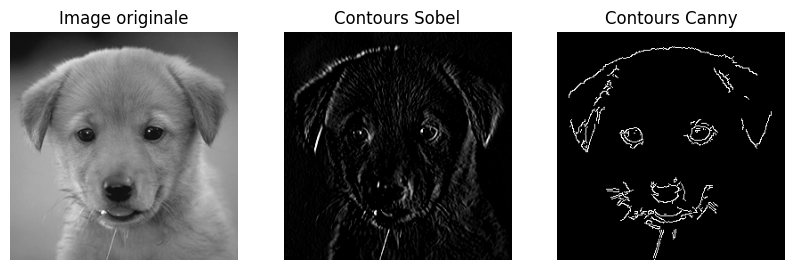

In [ ]:
import cv2
from matplotlib import pyplot as plt

Im = cv2.imread('image4.bmp', cv2.IMREAD_GRAYSCALE)

Im2 = cv2.Sobel(Im, cv2.CV_8U, 1, 0, ksize=3)

Im_canny = cv2.Canny(Im, 100, 200)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(Im, cmap='gray')
plt.title('Image originale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(Im2, cmap='gray')
plt.title('Contours Sobel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(Im_canny, cmap='gray')
plt.title('Contours Canny')
plt.axis('off')

plt.show()


# **Exercice5**

In [ ]:
import cv2

Im = cv2.imread('image1.bmp', cv2.IMREAD_GRAYSCALE)


In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


Im = cv2.imread('image1.bmp', cv2.IMREAD_GRAYSCALE)

nl, nc = Im.shape
T = np.float32(Im.reshape((-1, 1)))


K2 = KMeans(n_clusters=2).fit(T)
K3 = KMeans(n_clusters=3).fit(T)
K4 = KMeans(n_clusters=4).fit(T)
K7 = KMeans(n_clusters=5).fit(T)


ImK2 = np.uint8(K2.labels_.reshape(nl, nc))
ImK3 = np.uint8(K3.labels_.reshape(nl, nc))
ImK4 = np.uint8(K4.labels_.reshape(nl, nc))
ImK7 = np.uint8(K7.labels_.reshape(nl, nc))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


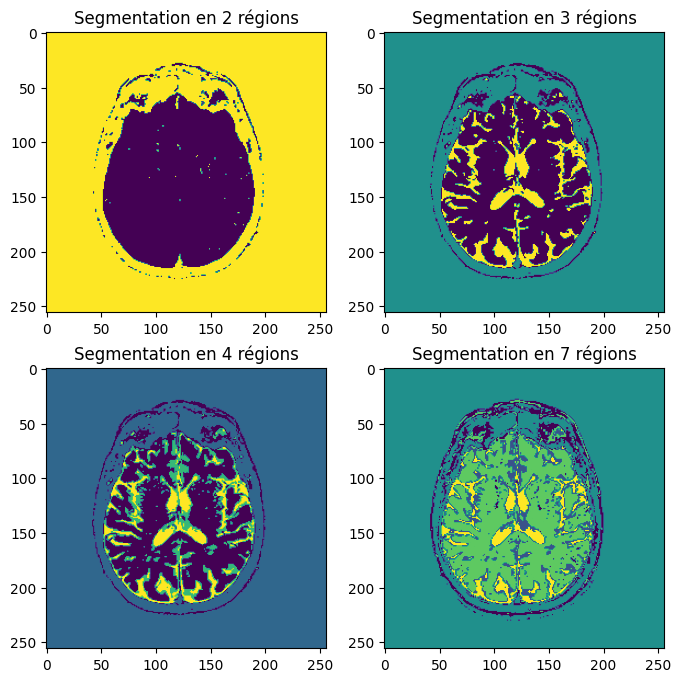

In [ ]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(ImK2)
plt.title('Segmentation en 2 régions')

plt.subplot(2, 2, 2)
plt.imshow(ImK3)
plt.title('Segmentation en 3 régions')

plt.subplot(2, 2, 3)
plt.imshow(ImK4)
plt.title('Segmentation en 4 régions')

plt.subplot(2, 2, 4)
plt.imshow(ImK7)
plt.title('Segmentation en 7 régions')

plt.show()